In [ ]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()


from sklearn import linear_model

%matplotlib inline
%precision 3

'%.3f'

In [ ]:
pwd

'/content'

In [ ]:
mkdir CH3

In [ ]:
cd ./CH3

/content/CH3


In [ ]:
# p.75
import requests, zipfile
from io import StringIO
import io

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
r = requests.get(url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [ ]:
ls

student-mat.csv  student-merge.R  student-por.csv  student.txt


In [ ]:
# p.76-77

student_data_math = pd.read_csv('student-mat.csv', sep = ';')
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
# p.78
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
cat student.txt

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or 

In [ ]:
# p.82

student_data_math.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

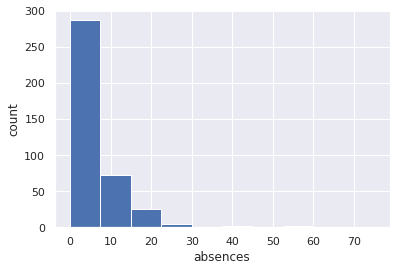

In [ ]:
# p.83

plt.hist(student_data_math['absences'])
plt.xlabel('absences')
plt.ylabel('count')
plt.grid(True)

In [ ]:
# p.83-84

print("student_data_math['absences']\n")
print('mean                 ', student_data_math['absences'].mean())
print('median               ', student_data_math['absences'].median())
print('mode                 ', student_data_math['absences'].mode())
print('variance             ', student_data_math['absences'].var(ddof=0))
print('standard deviation 1 ', student_data_math['absences'].std(ddof=0))
print('standard deviation 2 ', np.sqrt(student_data_math['absences'].var(ddof=1)))
print('')

# cf.
"""ddof : int, default 1
    Delta Degrees of Freedom. The divisor used in calculations is N - ddof,
    where N represents the number of elements."""
print()

student_data_math['absences']

mean                  5.708860759493671
median                4.0
mode                  0    0
dtype: int64
variance              63.887389841371515
standard deviation 1  7.992958766400057
standard deviation 2  8.003095687108177




In [ ]:
# p.85-86

print(".describe()")
print(student_data_math['absences'].describe())
print("\n")

print("interquartile range (IQR)")
print(student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4])

.describe()
count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64


interquartile range (IQR)
8.0


In [ ]:
# p.86

student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


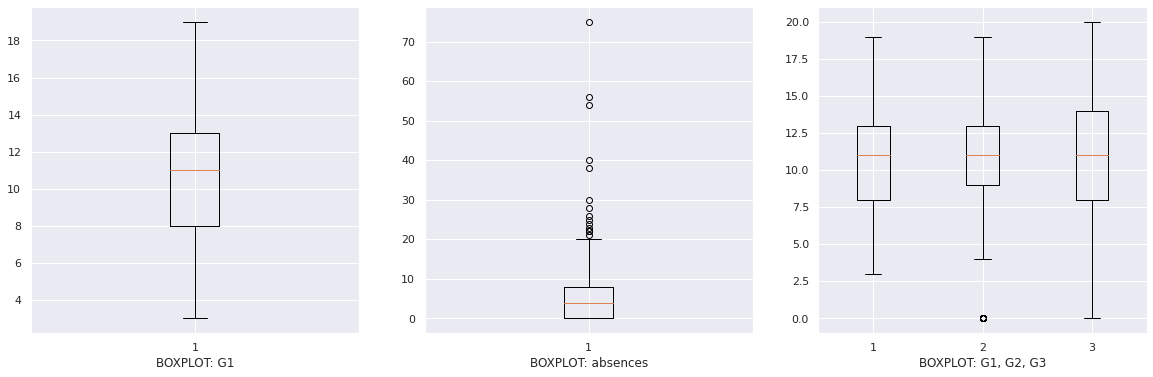

In [ ]:
# p.87-88

plt.figure(figsize=(20,6))

plt.subplot(1, 3, 1)
plt.boxplot(student_data_math['G1'])
plt.xlabel('BOXPLOT: G1')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.boxplot(student_data_math['absences'])
plt.xlabel('BOXPLOT: absences')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.boxplot([student_data_math['G1'], student_data_math['G2'], student_data_math['G3']])
plt.xlabel('BOXPLOT: G1, G2, G3')
plt.grid(True)

plt.show()

# 이상값은 엄밀한 정의가 없고 각 분야의 관례를 따릅니다. 위의 그래프에서는 이상값을 생략했지만 생략되지 않을 때도 있습니다.

In [ ]:
# p.89

# CV
student_data_math.std()/student_data_math.mean()

age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

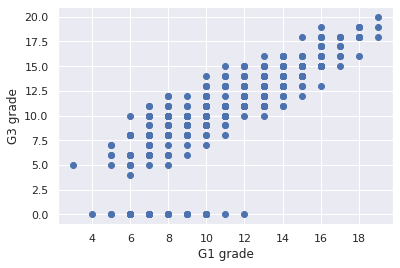

In [ ]:
# p.89

plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')

plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.grid(True)

In [ ]:
# p.90-92

# COV
print("cov")
print(np.cov(student_data_math['G1'], student_data_math['G3']))

print("\nvar")
print(student_data_math['G1'].var())
print(student_data_math['G3'].var())

# pearson correlation coefficient
print("\npearson")
print(sp.stats.pearsonr(student_data_math['G1'], student_data_math['G3']))

print("\ncorrcoef matrix")
print(np.corrcoef(student_data_math['G1'], student_data_math['G3']))

cov
[[11.017 12.188]
 [12.188 20.99 ]]

var
11.017053267364899
20.989616397866737

pearson
(0.8014679320174141, 9.001430312277354e-90)

corrcoef matrix
[[1.    0.801]
 [0.801 1.   ]]


Dalc
1    11.155797
2    10.306667
3    10.576923
4     9.777778
5    10.444444
Name: G1, dtype: float64
Walc
1    11.178808
2    11.270588
3    10.937500
4     9.980392
5     9.964286
Name: G1, dtype: float64
Dalc
1    10.731884
2     9.253333
3    10.500000
4     9.888889
5    10.666667
Name: G3, dtype: float64
Walc
1    10.735099
2    10.082353
3    10.725000
4     9.686275
5    10.142857
Name: G3, dtype: float64


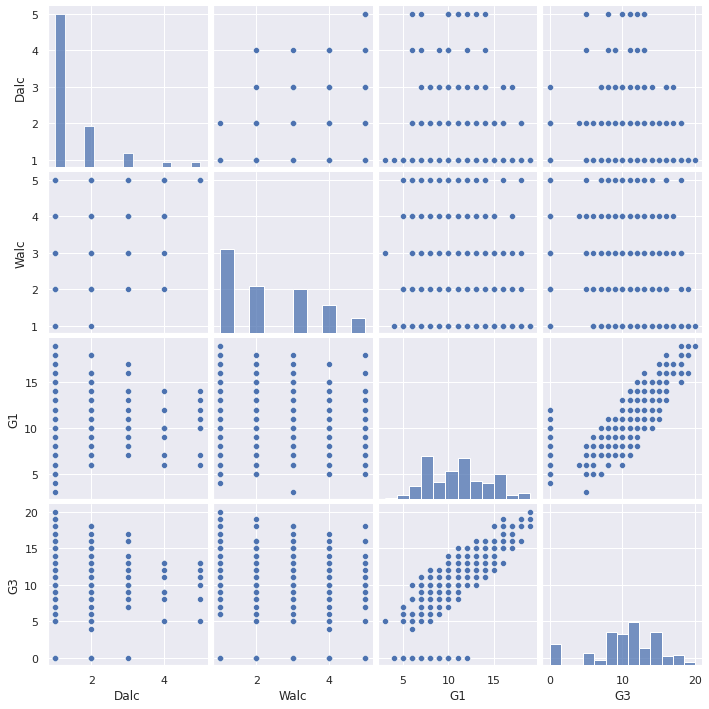

In [ ]:
# p. 92-93

# seaborn pairplot
sns.pairplot(student_data_math[['Dalc','Walc','G1','G3']])
plt.grid(True)

print(student_data_math.groupby('Dalc')['G1'].mean())
print(student_data_math.groupby('Walc')['G1'].mean())
print(student_data_math.groupby('Dalc')['G3'].mean())
print(student_data_math.groupby('Walc')['G3'].mean())

In [ ]:
# p.94 Practice

# 3-1.
print('3-1')

student_data_por = pd.read_csv('student-por.csv', sep = ';')
student_data_por.describe()

3-1


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [ ]:
# p.94 Practice

# 3-2.
print('3-2')

key = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason',  'nursery', 'internet']

student_data_merged = student_data_math.merge(student_data_por, how='inner', 
                                              left_on = key, right_on = key,
                                              suffixes=('_math', '_por'))

student_data_merged.describe()

3-2


,age,Medu,Fedu,traveltime_math,studytime_math,failures_math,famrel_math,freetime_math,goout_math,Dalc_math,Walc_math,health_math,absences_math,G1_math,G2_math,G3_math,traveltime_por,studytime_por,failures_por,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.586387,2.806283,2.565445,1.442408,2.034031,0.290576,3.939791,3.222513,3.112565,1.473822,2.280105,3.578534,5.319372,10.861257,10.712042,10.387435,1.445026,2.039267,0.141361,3.942408,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775,12.112565,12.238220,12.515707
std,1.173470,1.086381,1.096240,0.695378,0.845798,0.729481,0.921620,0.988233,1.131927,0.886229,1.282866,1.400360,7.625251,3.349167,3.832560,4.687242,0.699354,0.845571,0.513253,0.908884,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965,2.556531,2.468341,2.945438
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,8.250000,8.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,3.000000,10.500000,11.000000,11.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


3-3


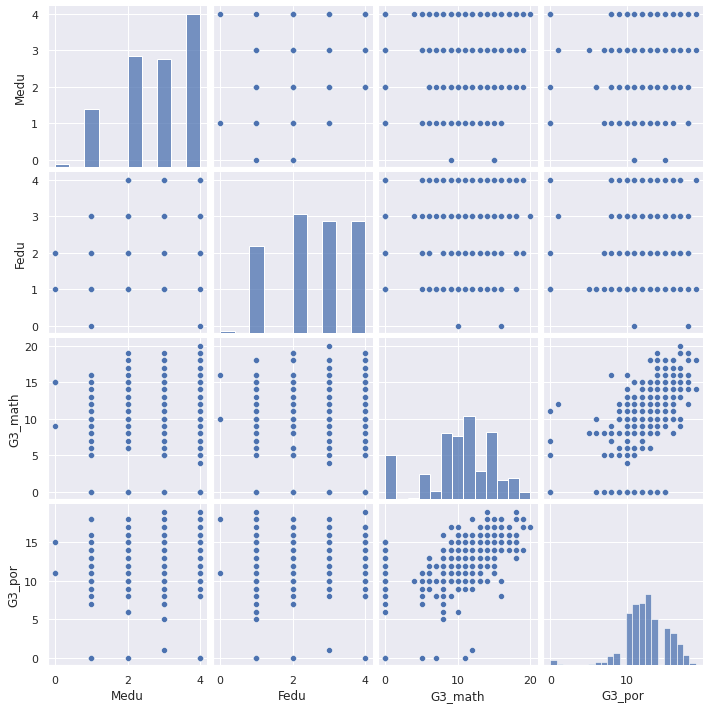

In [ ]:
# p.94 Practice

# 3-3.
print('3-3')

sns.pairplot(student_data_merged[['Medu', 'Fedu', 'G3_math', 'G3_por']])
plt.grid(True)

coef            [[1.106]]
intercept       [-1.653]
score R saured  0.6423508460522701


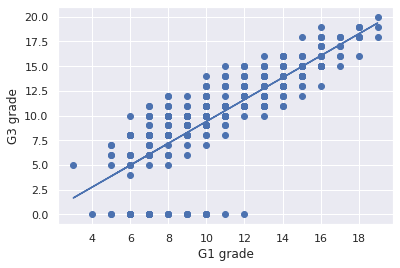

In [55]:
# p.96-97

# 선형회귀 인스턴스 생성
reg = linear_model.LinearRegression()

# 설명변수는 1학기 수학 성적
X = student_data_math.loc[:, ['G1']].values

# 목표변수는 최종 수학 성적
Y = student_data_math.loc[:, ['G3']].values

# 예측 모델 계산 a, b 산출
reg.fit(X, Y)

# 회귀계수
print('coef           ', reg.coef_)

# 절편
print('intercept      ', reg.intercept_)

# 결정계수
print('score R saured ', reg.score(X, Y))

# 산점도
plt.scatter(X, Y)
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

# 선형회귀선
plt.plot(X, reg.predict(X))
plt.grid(True)

3-4
3-5
coef_       [[0.973]]
intercept_  [0.82]
score       0.6829156800171085


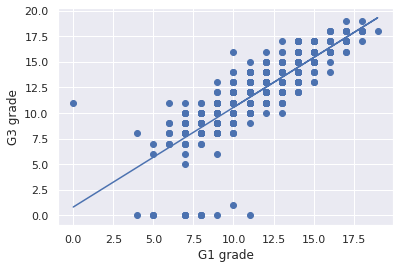

In [69]:
# p.98 Practice

# 3-4. 3-5.
print('3-4')
print('3-5')

reg2 = linear_model.LinearRegression()

X = student_data_por.loc[:, ['G1']].values
Y = student_data_por.loc[:, ['G3']].values
# 주의. 아래는 모두 안됨!!!!!
# X = student_data_por['G1']
# Y = student_data_por['G3']
# X = student_data_por.loc[:, 'G1']
# Y = student_data_por.loc[:, 'G3']
# X = student_data_por.loc[:, 'G1'].values
# Y = student_data_por.loc[:, 'G3'].values

reg2.fit(X, Y)

print('coef_      ', reg2.coef_)
print('intercept_ ', reg2.intercept_)
print('score      ', reg2.score(X, Y))

plt.scatter(X, Y)
plt.plot(X, reg2.predict(X))
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid(True)

3-6
coef_       [[-0.064]]
intercept_  [12.139]
score       0.008350131955637385


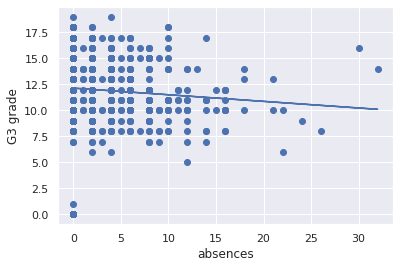

In [71]:
# p.98 Practice

# 3-6.
print('3-6')

reg3 = linear_model.LinearRegression()

X = student_data_por.loc[:, ['absences']].values
Y = student_data_por.loc[:, ['G3']].values

reg3.fit(X, Y)

print('coef_      ', reg3.coef_)
print('intercept_ ', reg3.intercept_)
print('score      ', reg3.score(X, Y))

plt.scatter(X, Y)
plt.plot(X, reg3.predict(X))
plt.xlabel('absences')
plt.ylabel('G3 grade')
plt.grid(True)

In [ ]:
# p.99 종합문제

# 종합문제 3-1

